In [5]:
# fetch usage data
import requests
import urllib.parse


endpoint = 'https://synbiohub.org/sparql?'

query_prefix = '''
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX dc: <http://purl.org/dc/elements/1.1/>
PREFIX sbh: <http://wiki.synbiohub.org/wiki/Terms/synbiohub#>
PREFIX prov: <http://www.w3.org/ns/prov#>
PREFIX sbol: <http://sbols.org/v2#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX purl: <http://purl.obolibrary.org/obo/>
'''

usage_query = query_prefix + '''
select distinct ?pcd ?ie ?ccd
WHERE
{
?pcd a sbol:ComponentDefinition ;
sbol:component ?sc;
prov:wasDerivedFrom ?ie .

?sc sbol:definition ?ccd
}
'''

uri_query = query_prefix + '''
select distinct ?cd
WHERE
{
?cd a sbol:ComponentDefinition
}
'''


def query_sparql(query, response_file):
    url = endpoint + urllib.parse.urlencode({'query': query})
    print(url)
    r = requests.get(url)

    print(r.status_code)
    print(r.encoding)
    print(r.headers['content-type'])
    print(r.content[0:100])

    f = open(response_file, 'w')
    f.write(r.content.decode('utf8'))
    f.close()

In [3]:
query_sparql(usage_query, 'usage_response.xml')

https://synbiohub.org/sparql?query=%0APREFIX+rdf%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%3E%0APREFIX+dcterms%3A+%3Chttp%3A%2F%2Fpurl.org%2Fdc%2Fterms%2F%3E%0APREFIX+dc%3A+%3Chttp%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%3E%0APREFIX+sbh%3A+%3Chttp%3A%2F%2Fwiki.synbiohub.org%2Fwiki%2FTerms%2Fsynbiohub%23%3E%0APREFIX+prov%3A+%3Chttp%3A%2F%2Fwww.w3.org%2Fns%2Fprov%23%3E%0APREFIX+sbol%3A+%3Chttp%3A%2F%2Fsbols.org%2Fv2%23%3E%0APREFIX+xsd%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F2001%2FXMLSchema%23%3E%0APREFIX+rdfs%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F2000%2F01%2Frdf-schema%23%3E%0APREFIX+purl%3A+%3Chttp%3A%2F%2Fpurl.obolibrary.org%2Fobo%2F%3E%0A%0Aselect+distinct+%3Fpcd+%3Fie+%3Fccd%0AWHERE%0A%7B%0A%3Fpcd+a+sbol%3AComponentDefinition+%3B%0Asbol%3Acomponent+%3Fsc%3B%0Aprov%3AwasDerivedFrom+%3Fie+.%0A%0A%3Fsc+sbol%3Adefinition+%3Fccd%0A%7D%0A
200
utf-8
application/sparql-results+xml; charset=utf-8
b'<sparql xmlns="http://www.w3.org/2005/sparql-results#" xmlns:xsi="http://www.w3.org/

In [4]:
query_sparql(uri_query, 'uri_response.xml')

https://synbiohub.org/sparql?query=%0APREFIX+rdf%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F1999%2F02%2F22-rdf-syntax-ns%23%3E%0APREFIX+dcterms%3A+%3Chttp%3A%2F%2Fpurl.org%2Fdc%2Fterms%2F%3E%0APREFIX+dc%3A+%3Chttp%3A%2F%2Fpurl.org%2Fdc%2Felements%2F1.1%2F%3E%0APREFIX+sbh%3A+%3Chttp%3A%2F%2Fwiki.synbiohub.org%2Fwiki%2FTerms%2Fsynbiohub%23%3E%0APREFIX+prov%3A+%3Chttp%3A%2F%2Fwww.w3.org%2Fns%2Fprov%23%3E%0APREFIX+sbol%3A+%3Chttp%3A%2F%2Fsbols.org%2Fv2%23%3E%0APREFIX+xsd%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F2001%2FXMLSchema%23%3E%0APREFIX+rdfs%3A+%3Chttp%3A%2F%2Fwww.w3.org%2F2000%2F01%2Frdf-schema%23%3E%0APREFIX+purl%3A+%3Chttp%3A%2F%2Fpurl.obolibrary.org%2Fobo%2F%3E%0A%0Aselect+distinct+%3Fcd%0AWHERE%0A%7B%0A%3Fcd+a+sbol%3AComponentDefinition%0A%7D%0A
200
utf-8
application/sparql-results+xml; charset=utf-8
b'<sparql xmlns="http://www.w3.org/2005/sparql-results#" xmlns:xsi="http://www.w3.org/2001/XMLSchema-i'


In [2]:
f = open('usage_response.xml', 'r')
usage_response = f.read()
f.close()

f = open('uri_response.xml', 'r')
uri_response = f.read()
f.close()

In [3]:
from xml.etree import ElementTree


# add uris as keys to usages
def populate_usage_uris(uri_response):
    usages = {}
    
    ns = {'sparql_results': 'http://www.w3.org/2005/sparql-results#'}
    
    root = ElementTree.fromstring(uri_response)
    results = root.find('sparql_results:results', ns)

    for result in results.findall('sparql_results:result', ns):
        bindings = result.findall('sparql_results:binding', ns)

        for binding in bindings:
            if binding.attrib['name'] == 'cd':
                cd = binding.find('sparql_results:uri', ns).text

        usages[cd] = []
    
    return usages


# add actual usage edges
def add_usages(usage_response, usages):
    ns = {'sparql_results': 'http://www.w3.org/2005/sparql-results#'}
    
    root = ElementTree.fromstring(usage_response)
    results = root.find('sparql_results:results', ns)

    for result in results.findall('sparql_results:result', ns):
        bindings = result.findall('sparql_results:binding', ns)

        for binding in bindings:
            if binding.attrib['name'] == 'pcd':
                pcd = binding.find('sparql_results:uri', ns).text

        for binding in bindings:
            if binding.attrib['name'] == 'ccd':
                ccd = binding.find('sparql_results:uri', ns).text

        usages[pcd].append(ccd)
    

usages = populate_usage_uris(uri_response)
add_usages(usage_response, usages)

In [4]:
# usage data sanity check
print(usages['https://synbiohub.org/public/igem/BBa_K1444010/1'])

['https://synbiohub.org/public/igem/BBa_K823003/1', 'https://synbiohub.org/public/igem/BBa_R0052/1', 'https://synbiohub.org/public/igem/BBa_K090505/1']


In [5]:
class graph:
    # create uri to index mapping
    def init_mapping(self, usages):
        uris = set()
        for parent in usages:
            uris.add(parent)
            for child in usages[parent]:
                uris.add(child)

        self.index2uri = list(uris)
        self.uri2index = {}

        for i in range(len(self.index2uri)):
            uri = self.index2uri[i]
            self.uri2index[uri] = i

        # assert mappings are correct
        for i in range(len(self.index2uri)):
            uri = self.index2uri[i]
            index = self.uri2index[uri]
            assert(index == i)
    
    
    def init_in_links(self, usages):
        for j in range(self.size):
            self.in_links[j] = []
        
        for parent in usages:
            for child in usages[parent]:
                parent_idx = self.uri2index[parent]
                child_idx = self.uri2index[child]
                self.in_links[child_idx].append(parent_idx)
            
            
    def init_number_out_links(self, usages):
        for j in range(self.size):
            self.number_out_links[j] = 0
            
        for parent in usages:
            parent_idx = self.uri2index[parent]
            number_children = len(usages[parent])
            self.number_out_links[parent_idx] = number_children
            
        
    def init_dangling_pages(self, usages):
        for parent in usages:
            number_children = len(usages[parent])
            if number_children == 0:
                self.dangling_pages.add(self.uri2index[parent])
                
                
    def __init__(self, usages):
        self.index2uri = []
        self.uri2index = {}
        self.init_mapping(usages)
        
        self.size = len(self.index2uri)
        
        self.in_links = {}
        self.init_in_links(usages)
        
        self.number_out_links = {}
        self.init_number_out_links(usages)
        
        self.dangling_pages = set()
        self.init_dangling_pages(usages)

In [7]:
import numpy as np

def pagerank(g, s=0.85, tolerance=0.000001):
    n = g.size
    p = np.matrix(np.ones((n, 1))) / n
    
    iteration = 1
    delta = 2
    
    dangling_contrib = sum([p[j] for j in g.dangling_pages]) / n
    teleportation_contrib = 1 / n
    
    while delta > tolerance:
        print('iteration: ' + str(iteration))
        
        v = np.matrix(np.zeros((n, 1)))
        for j in range(n):
            link_contrib = sum([p[k] / g.number_out_links[k] for k in g.in_links[j]])
            v[j] = s * link_contrib + s * dangling_contrib + (1 - s) * teleportation_contrib
        new_p = v / np.sum(v)
            
        delta = np.sum(np.abs(p - new_p))
        print('L1 norm delta: ' + str(delta))
        
        p = new_p
        iteration += 1
        
    return p

In [8]:
g = graph(usages)
pr = pagerank(g)
ranks = np.squeeze(np.asarray(pr))

iteration: 1
L1 norm delta: 0.39187094484851914
iteration: 2
L1 norm delta: 0.049334364751470745
iteration: 3
L1 norm delta: 0.005362513099212397
iteration: 4
L1 norm delta: 0.0008998019382141509
iteration: 5
L1 norm delta: 0.00016325973897196832
iteration: 6
L1 norm delta: 2.7765868353399483e-05
iteration: 7
L1 norm delta: 5.09364037618448e-06
iteration: 8
L1 norm delta: 6.639484082299381e-07


parts with popularity higher than 0.002
rank: 0.0023747654575426926 uri: https://synbiohub.org/public/igem/BBa_R0010/1
rank: 0.011615698929273414 uri: https://synbiohub.org/public/igem/BBa_B0010/1
rank: 0.016072607167464233 uri: https://synbiohub.org/public/igem/BBa_B0034/1
rank: 0.003267466067243685 uri: https://synbiohub.org/public/igem/BBa_E0040/1
rank: 0.006962402178576353 uri: https://synbiohub.org/public/igem/BBa_B0015/1
rank: 0.011986465634420462 uri: https://synbiohub.org/public/igem/BBa_B0012/1
rank: 0.003001010989319697 uri: https://synbiohub.org/public/igem/BBa_B0032/1
rank: 0.0034746125944101953 uri: https://synbiohub.org/public/igem/BBa_R0040/1
rank: 0.002071783211631047 uri: https://synbiohub.org/public/igem/BBa_R0011/1
rank: 0.003122024953371472 uri: https://synbiohub.org/public/igem/BBa_B0030/1


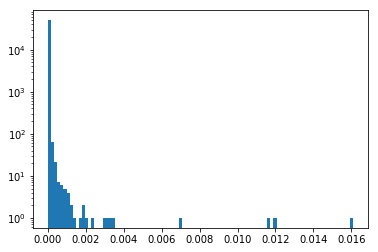

In [11]:
from matplotlib import pyplot as plt


# print most popular parts
popularity_threshold = 0.002
print('parts with popularity higher than ' + str(popularity_threshold))
for i in range(len(ranks)):
    if ranks[i] > popularity_threshold:
        print('rank: ' + str(ranks[i]) + ' uri: ' + g.index2uri[i])

        
# plot histogram
sorted_ranks = sorted(ranks)
#print(sorted_ranks)
outliers = 0
_ = plt.hist(sorted_ranks[0:len(sorted_ranks) - outliers], log=True, bins=100)